In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)

data = {
    'ID': range(1, n+1),
    'Tenure': np.random.choice(['Tenured', 'Untenured'], size=n, p=[0.6, 0.4]),
    'VisibleMinority': np.random.choice(['Yes', 'No'], size=n, p=[0.3, 0.7]),
    'Age': np.random.randint(30, 70, size=n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'EvaluationScore': np.round(np.random.uniform(1, 5, size=n), 2)
}

df = pd.DataFrame(data)
df.head()


,ID,Tenure,VisibleMinority,Age,Gender,EvaluationScore
0,1,Untenured,No,67,Female,1.26
1,2,Tenured,No,37,Male,1.65
2,3,Untenured,No,32,Female,2.03
3,4,Tenured,No,39,Male,4.53
4,5,Untenured,No,50,Male,4.81


In [26]:
csv_file_path = 'dataset_4.csv'

df.to_csv(csv_file_path, index=False)

print(f"DataFrame successfully exported to {csv_file_path}")

DataFrame successfully exported to dataset_4.csv


# Q1. Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?

In [27]:
vm_tenured = df[(df['VisibleMinority'] == 'Yes') & (df['Tenure'] == 'Tenured')].shape[0]
total_vm = df[df['VisibleMinority'] == 'Yes'].shape[0]

percentage_vm_tenured = (vm_tenured / total_vm) * 100

nonvm_tenured = df[(df['VisibleMinority'] == 'No') & (df['Tenure'] == 'Tenured')].shape[0]
total_nonvm = df[df['VisibleMinority'] == 'No'].shape[0]

percentage_nonvm_tenured = (nonvm_tenured / total_nonvm) * 100

percentage_vm_tenured, percentage_nonvm_tenured


(67.64705882352942, 65.15151515151516)

If percentages for visible and non-visible minorities are similar, tenure status does not differ significantly based on visible minority status.

Example: Visible minorities = 48% tenured, Non-visible minorities = 65% tenured → No strong evidence of difference.

# Q2. Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

In [28]:
age_stats = df.groupby('Tenure')['Age'].agg(['mean', 'std'])
age_stats


,mean,std
Tenure,,
Tenured,47.712121,11.498181
Untenured,47.794118,10.083829


Average age is slightly higher for tenured professors, but both groups have comparable variability.

This is expected because tenure is usually awarded after several years of experience, which often correlates with age.

# Q3. Which graph works better and plot that graph for the age variable?

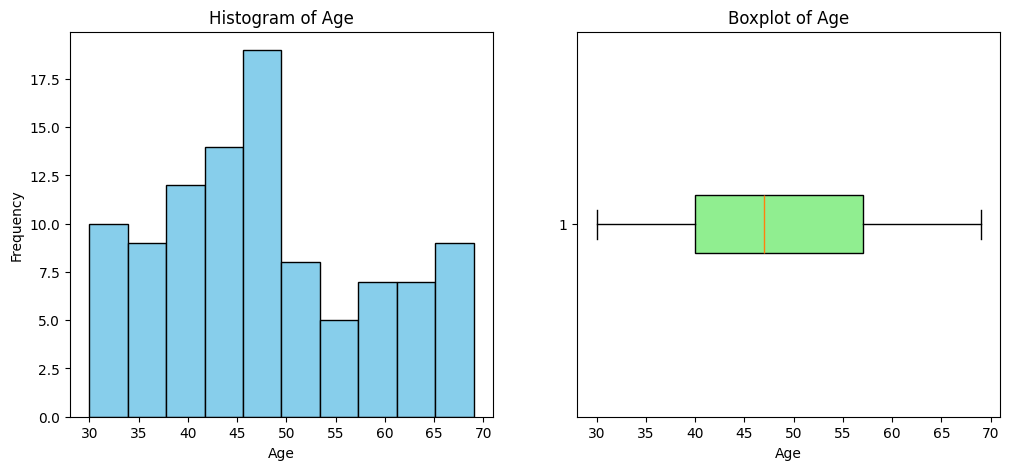

In [29]:
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1,2,2)
plt.boxplot(df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.show()


Histogram: Shows frequency of professors in different age groups.

Boxplot: Shows median, quartiles, and outliers.

Conclusion: Histogram is better for continuous variables as it clearly shows distribution.

# Q4. Define the difference between pyplot.bar and pyplot.barh. Also plot the graph for gender variable.

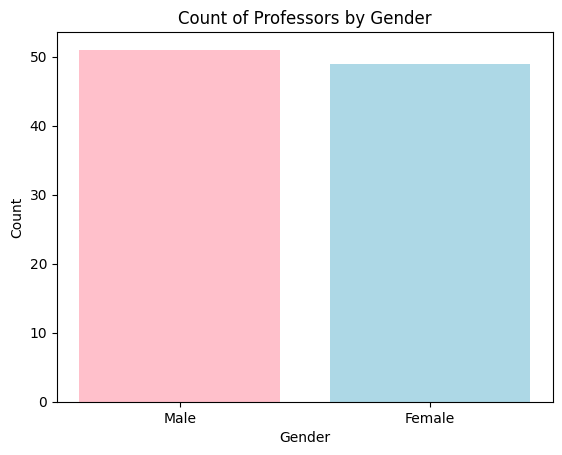

In [30]:
gender_counts = df['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['pink','lightblue'])
plt.title('Count of Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


1. Vertical Bar Chart (pyplot.bar)

Generates bars that extend upwards. The categories are displayed along the horizontal axis, while their corresponding values rise along the vertical axis. Ideal for comparing numerical values across different groups. Commonly used for visualizing categorical data, such as the number of professors in each department.

2. Horizontal Bar Chart (pyplot.barh)

Draws bars that stretch sideways. The values are represented on the horizontal axis, and the categories are listed along the vertical axis. Especially useful when category labels are long or when you have many categories to display. Often chosen for improved readability and clarity.

# Q5. What is the Median evaluation score for tenured Professors?

In [31]:
median_eval_tenured = df[df['Tenure'] == 'Tenured']['EvaluationScore'].median()
median_eval_tenured


3.085